In [ ]:

import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C://Users//Jayanth//OneDrive - The Pennsylvania State University//Desktop//Visual//Machine Learning//tmpuhmn3fu7.csv",low_memory=False)

In [4]:
df 

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,232007173,3115,NaN,INVESTIGATE PERSON,B3,,0,2023-01-27 22:44:00+00,2023,1,Friday,22,NaN,FAVRE ST,42.271661,-71.099535,"(42.271661031027065, -71.09953455161765)"
1,232004454,3301,NaN,VERBAL DISPUTE,B2,316,0,2023-01-17 20:21:00+00,2023,1,Tuesday,20,NaN,HAROLD ST,42.312596,-71.092876,"(42.3125962960786, -71.09287583752645)"
2,232006290,3115,NaN,INVESTIGATE PERSON,A1,,0,2023-01-24 00:00:00+00,2023,1,Tuesday,0,NaN,HANOVER ST,42.365699,-71.052892,"(42.3656993584582, -71.05289203191269)"
3,232024939,3114,NaN,INVESTIGATE PROPERTY,B3,,0,2023-03-31 17:14:00+00,2023,3,Friday,17,NaN,BLUE HILL AVE,42.292788,-71.088520,"(42.29278799134922, -71.08851953962399)"
4,232006708,423,NaN,ASSAULT - AGGRAVATED,B2,,0,2023-01-26 09:00:00+00,2023,1,Thursday,9,NaN,HUTCHINGS ST,42.310269,-71.089311,"(42.310268910354935, -71.08931055058088)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196359,232030815,3410,NaN,TOWED MOTOR VEHICLE,C11,NaN,0,2023-04-21 12:26:00+00,2023,4,Friday,12,NaN,ELDON ST,NaN,NaN,NaN
196360,232019968,1831,NaN,SICK ASSIST,E13,NaN,0,2023-03-15 21:18:00+00,2023,3,Wednesday,21,NaN,PARLEY VALE,NaN,NaN,NaN
196361,232019628,3831,NaN,M/V - LEAVING SCENE - PROPERTY DAMAGE,D14,NaN,0,2023-03-14 15:01:00+00,2023,3,Tuesday,15,NaN,BRENTWOOD ST,NaN,NaN,NaN
196362,242082277,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,B3,470,0,2024-09-26 16:19:00+00,2024,9,Thursday,16,NaN,ORLANDO ST,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196364 entries, 0 to 196363
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      196364 non-null  object 
 1   OFFENSE_CODE         196364 non-null  int64  
 2   OFFENSE_CODE_GROUP   0 non-null       float64
 3   OFFENSE_DESCRIPTION  196364 non-null  object 
 4   DISTRICT             195949 non-null  object 
 5   REPORTING_AREA       165930 non-null  object 
 6   SHOOTING             196364 non-null  int64  
 7   OCCURRED_ON_DATE     196364 non-null  object 
 8   YEAR                 196364 non-null  int64  
 9   MONTH                196364 non-null  int64  
 10  DAY_OF_WEEK          196364 non-null  object 
 11  HOUR                 196364 non-null  int64  
 12  UCR_PART             0 non-null       float64
 13  STREET               196364 non-null  object 
 14  Lat                  184453 non-null  float64
 15  Long             

In [6]:
print("\n--- Missing Values ---")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({"Missing Count": missing, "Missing %": missing_percent})
print(missing_df.sort_values(by='Missing %', ascending=False))


--- Missing Values ---
                     Missing Count   Missing %
OFFENSE_CODE_GROUP          196364  100.000000
UCR_PART                    196364  100.000000
REPORTING_AREA               30434   15.498768
Lat                          11911    6.065776
Location                     11911    6.065776
Long                         11911    6.065776
DISTRICT                       415    0.211342
INCIDENT_NUMBER                  0    0.000000
OFFENSE_CODE                     0    0.000000
YEAR                             0    0.000000
OCCURRED_ON_DATE                 0    0.000000
SHOOTING                         0    0.000000
OFFENSE_DESCRIPTION              0    0.000000
HOUR                             0    0.000000
DAY_OF_WEEK                      0    0.000000
MONTH                            0    0.000000
STREET                           0    0.000000


In [7]:
cols_to_drop = missing_df[missing_df["Missing %"] == 100].index.tolist()
if cols_to_drop:
    print(f"\nDropping columns with 100% missing: {cols_to_drop}")
    df = df.drop(columns=cols_to_drop)


Dropping columns with 100% missing: ['OFFENSE_CODE_GROUP', 'UCR_PART']


In [8]:
df_clean = df.dropna(subset=['Lat', 'Long'])

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184453 entries, 0 to 196351
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      184453 non-null  object 
 1   OFFENSE_CODE         184453 non-null  int64  
 2   OFFENSE_DESCRIPTION  184453 non-null  object 
 3   DISTRICT             184453 non-null  object 
 4   REPORTING_AREA       184453 non-null  object 
 5   SHOOTING             184453 non-null  int64  
 6   OCCURRED_ON_DATE     184453 non-null  object 
 7   YEAR                 184453 non-null  int64  
 8   MONTH                184453 non-null  int64  
 9   DAY_OF_WEEK          184453 non-null  object 
 10  HOUR                 184453 non-null  int64  
 11  STREET               184453 non-null  object 
 12  Lat                  184453 non-null  float64
 13  Long                 184453 non-null  float64
 14  Location             184453 non-null  object 
dtypes: float64(2), int64(5

In [10]:
df_clean.loc[:, 'DISTRICT'] = df_clean['DISTRICT'].fillna('Unknown')
df_clean.loc[:, 'REPORTING_AREA'] = df_clean['REPORTING_AREA'].fillna('Unknown')


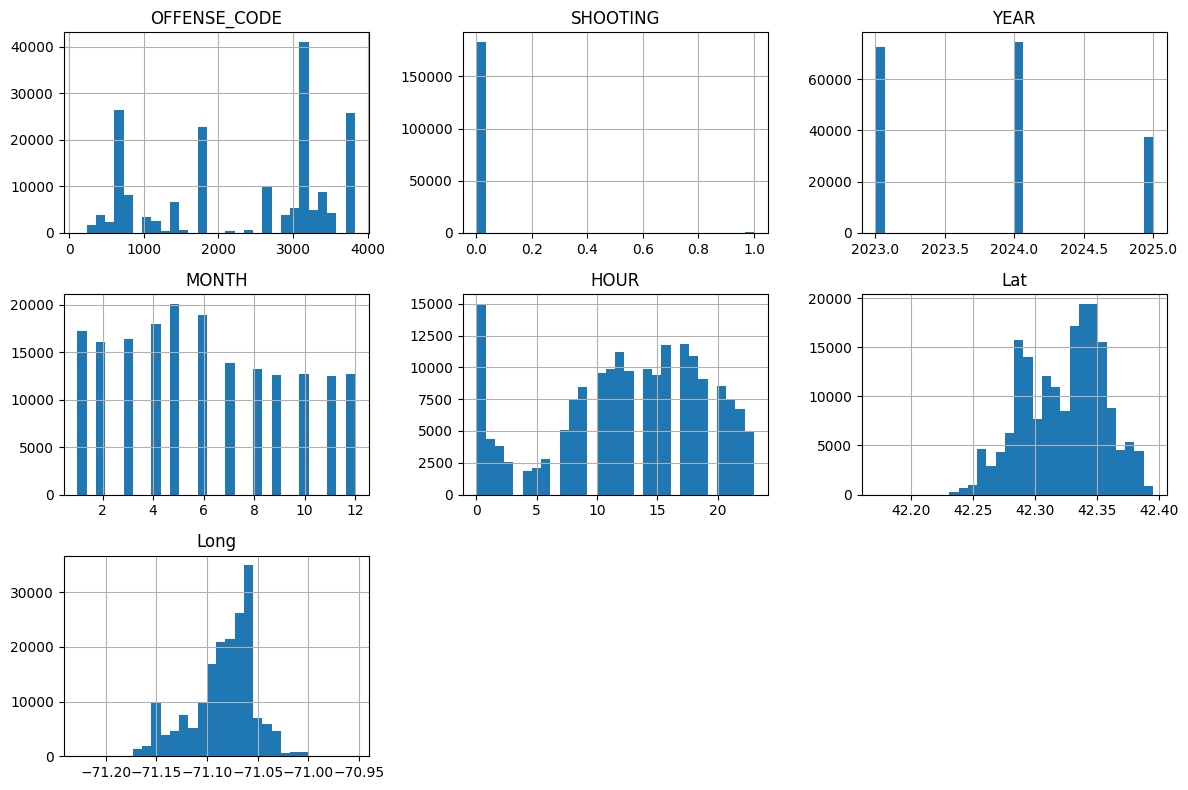

In [12]:
import matplotlib.pyplot as plt

numeric_cols = df_clean.select_dtypes(include="number").columns.tolist()

# Histograms
df_clean[numeric_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout(); plt.show()

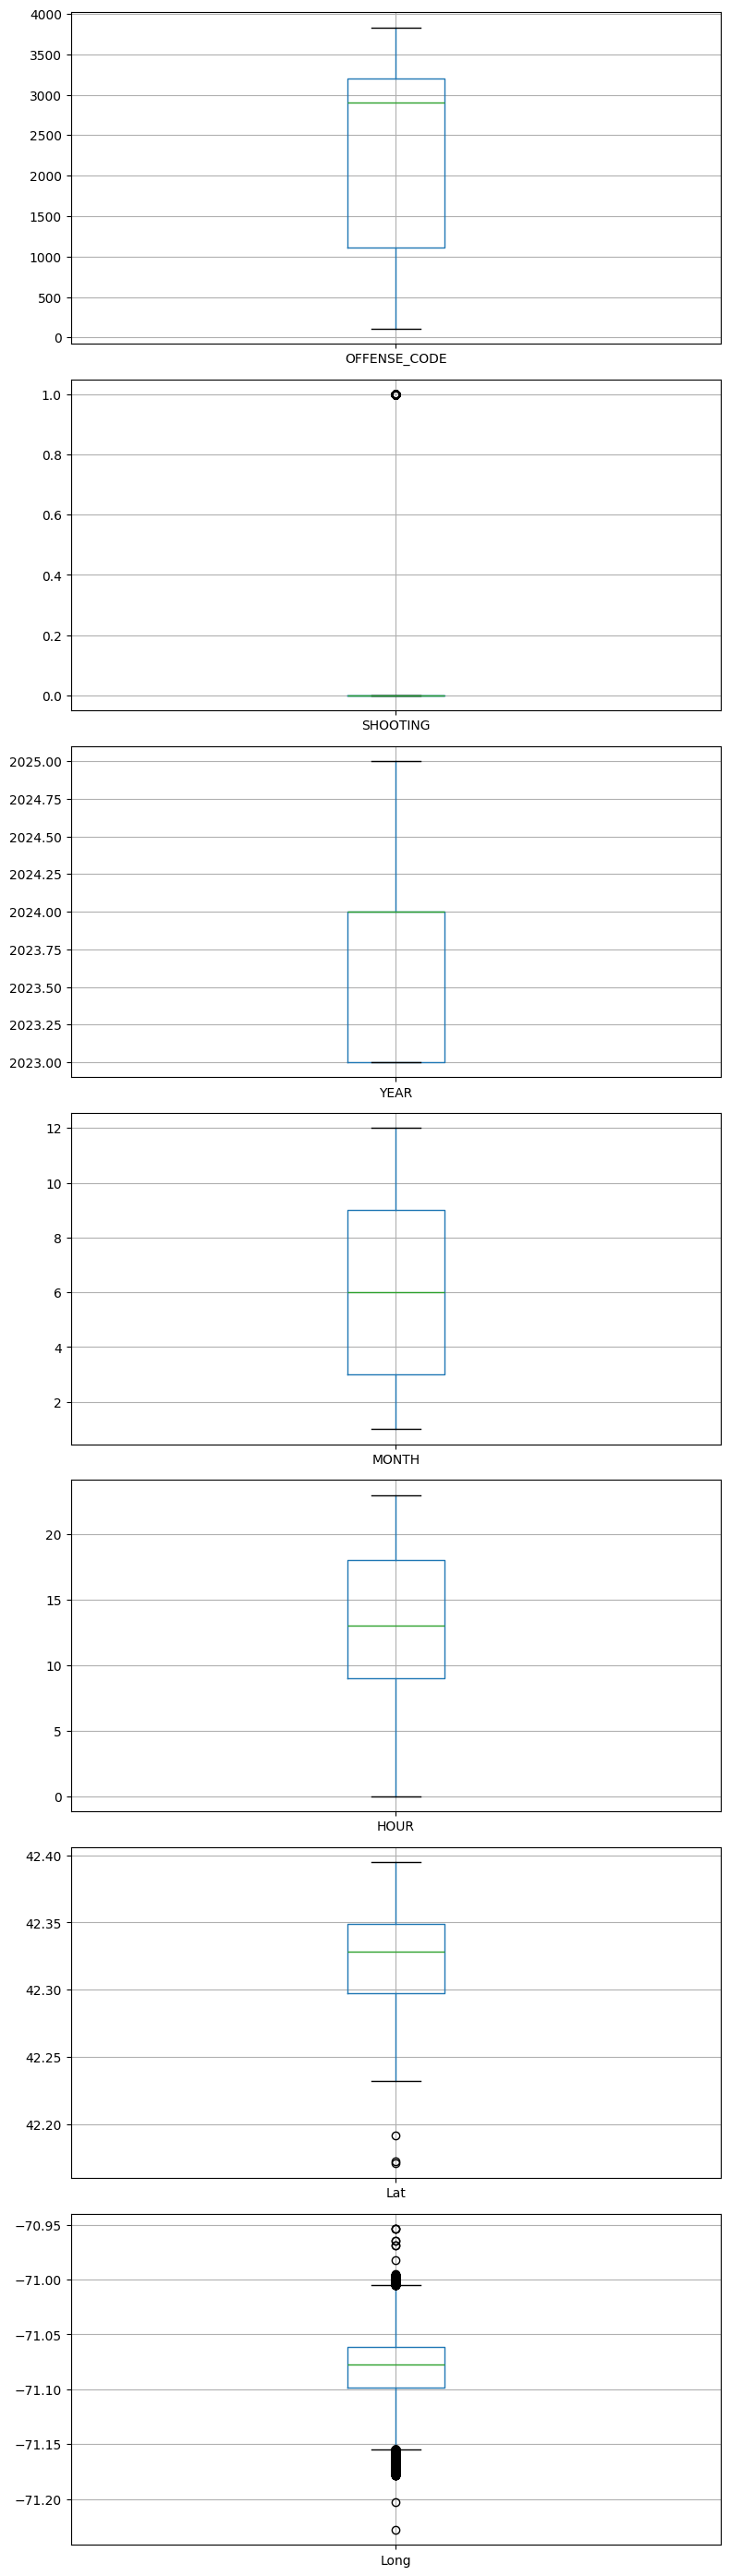

In [13]:
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 4*len(numeric_cols)))
for ax, col in zip(axes, numeric_cols):
    df_clean.boxplot(column=col, ax=ax)
plt.tight_layout(); plt.show()

<Axes: >

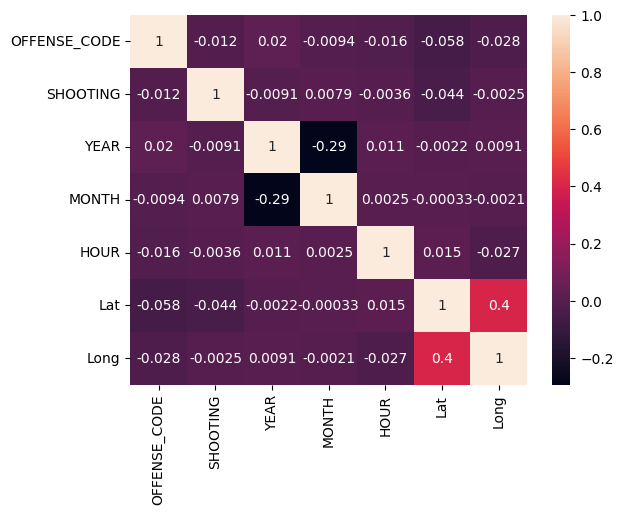

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_clean.select_dtypes(include='number').corr(), annot=True)




<Axes: >

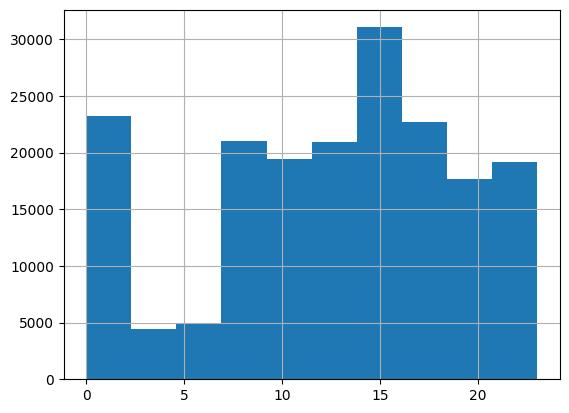

In [25]:
# histogram of hours
df_clean['HOUR'].hist()



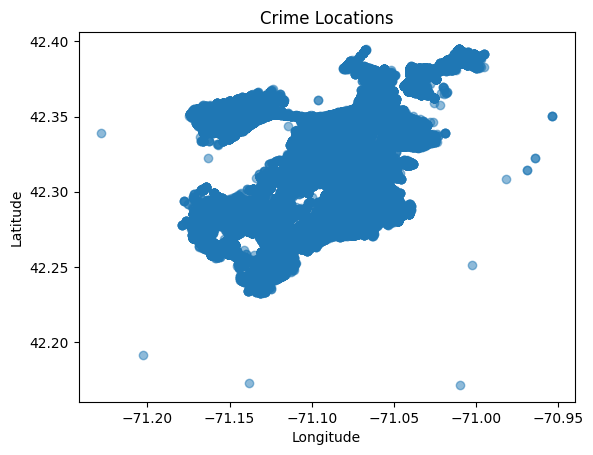

In [26]:
# scatter plot of Lat/Long
plt.scatter(df_clean['Long'], df_clean['Lat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crime Locations')
plt.show()